In [69]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as op
from pylab import *

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def cauchy(x, *p):
    mu, gamma = p
    return gamma/((x-mu)**2+gamma**2)*np.pi**(-1)

# Exercise 01.1.1:

calculating $\langle r \rangle$

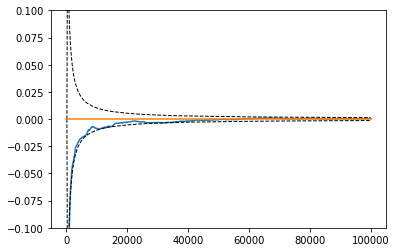

In [3]:
dat = np.loadtxt("ex1.1.dat")
plt.plot(dat[:,0], dat[:,1]-0.5)
plt.plot(dat[:,0], 0+dat[:,2], linestyle = "dashed", color = "black", linewidth = 1)
plt.plot(dat[:,0], 0-dat[:,2], linestyle = "dashed", color = "black", linewidth = 1)
plt.plot([0, dat[-1,0]], [0, 0])
plt.ylim(-0.1,0.1)
plt.show()

# Exercise 01.1.2:


calulating $\sigma^2 =\langle r^2 \rangle - \langle r \rangle^2$

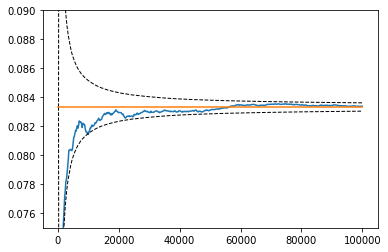

In [4]:
dat = np.loadtxt("ex1.2.dat")

#print(dat)
#plt.errorbar(dat[:,0], dat[:,1], yerr = dat[:,2])
plt.plot(dat[:,0], dat[:,1])
plt.plot(dat[:,0],1/12 - dat[:,2], linestyle = "dashed", color = "black", linewidth = 1)
plt.plot(dat[:,0],1/12 + dat[:,2], linestyle = "dashed", color = "black", linewidth = 1)
plt.plot([0, dat[-1,0]], [1/12, 1/12])
plt.ylim(0.075,0.09)
plt.show()

# Exercise 01.1.3:

calculating $\chi^2$ for $j = 1, \dots, 100$ $$ \chi_j^2 = \sum_{i=0}^{M} \frac{(n_i - n/M)^2}{n/M}$$

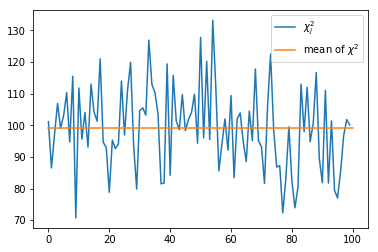

In [5]:
dat = np.loadtxt("ex1.3.dat")
mean = np.mean(dat)

#print(dat)
plt.plot(dat, label = "$\chi_j^2$")
plt.plot([0,100], [mean,mean], label = "mean of $\chi^2 $")
plt.legend()
plt.show()

# Exercise 01.2:
the 'normal dice'

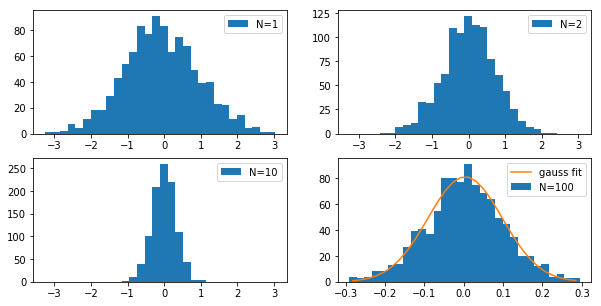

At N = 100, the distribution converges to a normal distribution with mu = 0.0 and sigma = 0.09


In [90]:
dat1 = np.loadtxt("ex2.1.dat")
bins = 30
ra = (min(dat1[:,0]), max(dat1[:,0]))

plt.figure(figsize = (10,5))

plt.subplot(221)
plt.hist(dat1[:,0], bins, ra, label = 'N=1')
plt.legend()

plt.subplot(222)
plt.hist(dat1[:,1], bins, ra, label = 'N=2')
plt.legend()

plt.subplot(223)
plt.hist(dat1[:,2], bins, ra, label = 'N=10')
plt.legend()

plt.subplot(224)
h = plt.hist(dat1[:,3], bins, label = 'N=100')

p0 = [1., 0., 0.5]
hc = h[1][0:-1] + (h[1][1]-h[1][0])/2
coeff, var_matrix = op.curve_fit(gauss, hc, h[0], p0=p0)
f = gauss(hc, *coeff)
plt.plot(hc, f, label='gauss fit')
plt.legend()

plt.show()

print('At N = 100, the distribution converges to a normal distribution with mu =',np.round(coeff[1],2),
      'and sigma =',np.round(np.abs(coeff[2]),2))

the 'exponential dice'

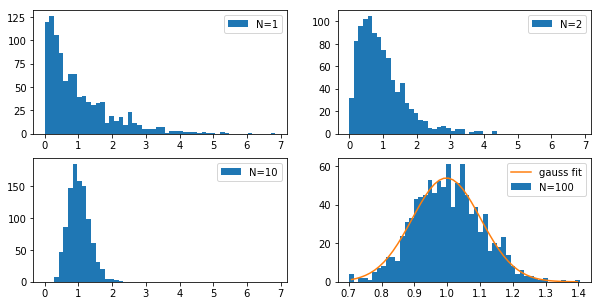

At N = 100, the distribution converges to a normal distribution with mu = 1.0 and sigma = 0.1


In [91]:
dat2 = np.loadtxt("ex2.2.dat")
bins = 50
ra = (min(dat2[:,0]), max(dat2[:,0]))
plt.figure(figsize = (10,5))

plt.subplot(221)
plt.hist(dat2[:,0], bins, ra, label = 'N=1')
plt.legend()

plt.subplot(222)
plt.hist(dat2[:,1], bins, ra, label = 'N=2')
plt.legend()

plt.subplot(223)
plt.hist(dat2[:,2], bins, ra, label = 'N=10')
plt.legend()

plt.subplot(224)
h = plt.hist(dat2[:,3], bins, label = 'N=100')

p0 = [1., 1., 0.2]
hc = h[1][0:-1] + (h[1][1]-h[1][0])/2
coeff, var_matrix = op.curve_fit(gauss, hc, h[0], p0=p0)
f = gauss(hc, *coeff)
plt.plot(hc, f, label='gauss fit')
plt.legend()

plt.show()

print('At N = 100, the distribution converges to a normal distribution with mu =',np.round(coeff[1],2),
      'and sigma =',np.round(np.abs(coeff[2]),2))

the 'cauchy dice'

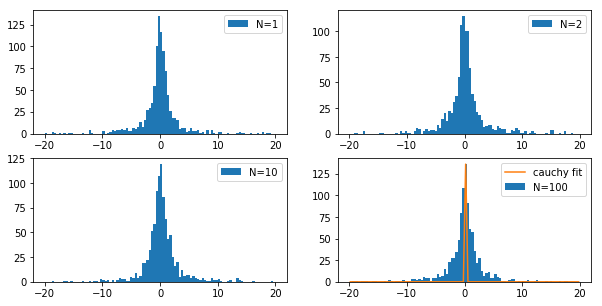

At N = 100, the distribution converges to a cauchy distribution with mu = 0.2 and gamma = 0.0


In [101]:
dat3 = np.loadtxt("ex2.3.dat")
bins = 100
#ra = (min(dat3[:,0]), max(dat3[:,0]))
ra = (-20,20)
plt.figure(figsize = (10,5))

plt.subplot(221)
plt.hist(dat3[:,0], bins, ra, label = 'N=1')
plt.legend()

plt.subplot(222)
plt.hist(dat3[:,1], bins, ra, label = 'N=2')
plt.legend()

plt.subplot(223)
plt.hist(dat3[:,2], bins, ra, label = 'N=10')
plt.legend()

plt.subplot(224)
h = plt.hist(dat3[:,3], bins, ra, label = 'N=100')

p0 = [1., 1.]
hc = h[1][0:-1] + (h[1][1]-h[1][0])/2
coeff, var_matrix = op.curve_fit(cauchy, hc, h[0], p0=p0)
f = cauchy(hc, *coeff)
plt.plot(hc, f, label='cauchy fit')
plt.legend()

plt.show()

print('At N = 100, the distribution converges to a cauchy distribution with mu =',np.round(coeff[0],2),
      'and gamma =',np.round(coeff[1],2))


# Exercise 01.3: calculating $\pi$:

pi = 3.14051 +/- 0.0099311


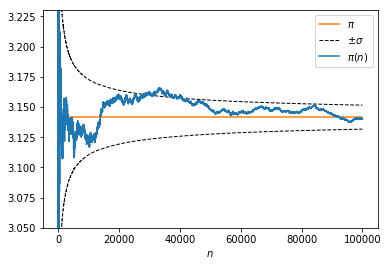

In [9]:
dat = np.loadtxt("ex3.dat")

print("pi =", dat[-1,1], "+/-", dat[-1,2])
plt.plot([0, dat[-1,0]], [np.pi, np.pi], color = "tab:orange", label  = "$\pi$")
plt.plot(dat[:,0], np.pi + dat[:,2], linestyle='dashed', linewidth=1, color='black', label = "$\pm \sigma$")
plt.plot(dat[:,0], np.pi - dat[:,2], linestyle='dashed', linewidth=1, color='black')
plt.plot(dat[:,0], dat[:,1], color = "tab:blue", label = "$\pi (n)$")
plt.ylim(3.05, 3.23)
plt.legend()
plt.xlabel("$n$")
plt.show()